<a href="https://colab.research.google.com/github/ravikrishnareddy/deep_learning/blob/main/ZeroToMastery/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression model with neural networks using TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Create data to view and fit

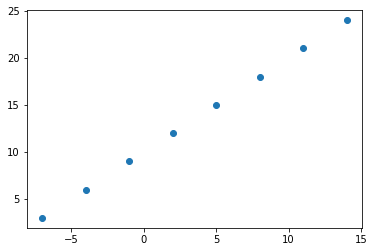

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize the data
plt.scatter(X, y)
plt.show()

# Input and output shapes

In [3]:
X.shape, y.shape

((8,), (8,))

In [4]:
X[0].shape, y[0].shape

((), ())

# Convert numpy arrays into tensors

In [5]:
X = tf.constant(X)
y = tf.constant(y)

print(X)
print('')
print(y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)

tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compile the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting the model** - Letting the model try to find the patterns between X and y (features and label)

In [6]:
# set seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 461ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
# Check X and y
print(X)
print('')
print(y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)

tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


In [8]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improve the model
We can improve our model by altering any or all of the steps in modelling. Following are the changes we can do in each of the modelling steps;
1. **Creating a model**
    * Add more hidden layers
    * Increase the number of hidden units (also called as neurons) in each of the hidden layers
    * Change the activation function of each layer
2. **Compile the model**
    * Change optimization function
    * Change the learning rate of optimation function
3. **Fitting the model**
    * Fit a model for more epochs (leaving it training for longer)
    * Use more data for training (giving the model more examples to learn from)

In [12]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.SGD(), 
    metrics = ['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 210ms/step - loss: 9.8244 - mae: 9.8244
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6919 - mae: 9.6919
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5594 - mae: 9.5594
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4269 - mae: 9.4269
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2944 - mae: 9.2944
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1619 - mae: 9.1619
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0294 - mae: 9.0294
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8969 - mae: 8.8969
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7644 - mae: 8.7644
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6319 - mae: 8.6319
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 8.499

In [13]:
# Let us see if our model's prediction has improved
model.predict([17.0])

array([[29.955261]], dtype=float32)

In [60]:
# Try improving the model
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 505ms/step - loss: 14.5427 - mae: 14.5427
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.8299 - mae: 13.8299
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1220 - mae: 13.1220
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4184 - mae: 12.4184
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7182 - mae: 11.7182
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0200 - mae: 11.0200
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3217 - mae: 10.3217
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6209 - mae: 9.6209
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9150 - mae: 8.9150
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2008 - mae: 8.2008
Epoch 11/100
1/1 [==============================] - 0s 9ms/ste

In [64]:
# Check if model's prediction improved
model.predict([17.0])

array([[27.289186]], dtype=float32)